> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset of Crime in San Francisco (from Kaggle)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

Kaggle dataset:
https://www.kaggle.com/c/sf-crime/data

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

data = pd.read_csv('kaggle_crime_data_sf.csv')

In [3]:
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [4]:
data.Category.value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [5]:
data.Descript.value_counts()

GRAND THEFT FROM LOCKED AUTO                                60022
LOST PROPERTY                                               31729
BATTERY                                                     27441
STOLEN AUTOMOBILE                                           26897
DRIVERS LICENSE, SUSPENDED OR REVOKED                       26839
WARRANT ARREST                                              23754
SUSPICIOUS OCCURRENCE                                       21891
AIDED CASE, MENTAL DISTURBED                                21497
PETTY THEFT FROM LOCKED AUTO                                19771
MALICIOUS MISCHIEF, VANDALISM OF VEHICLES                   17789
TRAFFIC VIOLATION                                           16471
PETTY THEFT OF PROPERTY                                     16196
MALICIOUS MISCHIEF, VANDALISM                               15957
THREATS AGAINST LIFE                                        14716
FOUND PROPERTY                                              12146
ENROUTE TO

In [6]:
data.DayOfWeek.value_counts()

Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: DayOfWeek, dtype: int64

In [7]:
data.PdDistrict.value_counts()

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64

In [8]:
data.Resolution.value_counts()

NONE                                      526790
ARREST, BOOKED                            206403
ARREST, CITED                              77004
LOCATED                                    17101
PSYCHOPATHIC CASE                          14534
UNFOUNDED                                   9585
JUVENILE BOOKED                             5564
COMPLAINANT REFUSES TO PROSECUTE            3976
DISTRICT ATTORNEY REFUSES TO PROSECUTE      3934
NOT PROSECUTED                              3714
JUVENILE CITED                              3332
PROSECUTED BY OUTSIDE AGENCY                2504
EXCEPTIONAL CLEARANCE                       1530
JUVENILE ADMONISHED                         1455
JUVENILE DIVERTED                            355
CLEARED-CONTACT JUVENILE FOR MORE INFO       217
PROSECUTED FOR LESSER OFFENSE                 51
Name: Resolution, dtype: int64

[Text(0,0.5,'latitude'),
 Text(0.5,0,'longitude'),
 Text(0.5,1,'Geographical location of crimes in SF')]

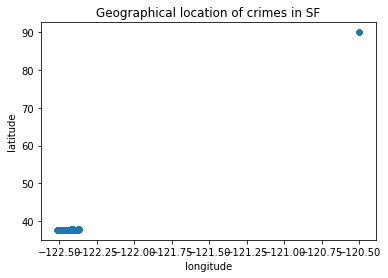

In [24]:
ax = data.plot.scatter(x='X', y='Y') # in the dataset, X is longitude and Y is latitude
ax.set(xlabel="longitude", ylabel="latitude", title="Geographical location of crimes in SF")

In [10]:
data.X.describe()

count    878049.000000
mean       -122.422616
std           0.030354
min        -122.513642
25%        -122.432952
50%        -122.416420
75%        -122.406959
max        -120.500000
Name: X, dtype: float64

In [11]:
data.Y.describe()

count    878049.000000
mean         37.771020
std           0.456893
min          37.707879
25%          37.752427
50%          37.775421
75%          37.784369
max          90.000000
Name: Y, dtype: float64

In [12]:
data[data.Y == 90].head(10)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
660485,2005-12-30 17:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,TENDERLOIN,NONE,5THSTNORTH ST / OFARRELL ST,-120.5,90.0
660711,2005-12-30 00:34:00,ASSAULT,INFLICT INJURY ON COHABITEE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0
660712,2005-12-30 00:34:00,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0
661106,2005-12-29 00:07:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,TENDERLOIN,PSYCHOPATHIC CASE,5THSTNORTH ST / EDDY ST,-120.5,90.0
666430,2005-11-30 11:25:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,TENDERLOIN,"ARREST, CITED",5THSTNORTH ST / ELLIS ST,-120.5,90.0
667042,2005-11-28 16:04:00,TRESPASS,TRESPASSING,Monday,TENDERLOIN,"ARREST, BOOKED",ELLIS ST / 5THSTNORTH ST,-120.5,90.0
669946,2005-11-14 09:20:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,BAYVIEW,"ARREST, BOOKED",YOSEMITE AV / WILLIAMS AV,-120.5,90.0
671709,2005-11-02 20:30:00,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Wednesday,CENTRAL,NONE,BRENHAM PL / WASHINGTON ST,-120.5,90.0
673078,2005-10-23 20:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,RICHMOND,NONE,AVENUE OF THE PALMS / GEARY BL,-120.5,90.0
673114,2005-10-23 18:11:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Sunday,TARAVAL,"ARREST, BOOKED",STCHARLES AV / 19TH AV,-120.5,90.0


#### Obs. about that latitude (column Y) and longitude (column X):
Some latitudes/longitudes seem to be wrong, as they do not fall in San Francisco. I saw that making the scatter plot and checking the lat./long. on Google Maps. When I tried to find a few of these addresses, I realized that the addresses were not well defined (e.g. crossing of two parallel streets). <i>This should be taken into account, if we decide to create a heat map with Google Maps. <b>However, I decided not to remove these rows from the data, because they have the district and other useful information (e.g. type of crime and day of week)</b></i>.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning

As I said previously, I noticed that some rows don't have the correct latitudes and longitudes, but I decided not to remove it because they have enough information about the type of crime, day of week and the district.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 - What's the distribution of crimes per day of week per district?

Here we are trying to see in which days the police has to work more (or maybe we would need more policemen in the streets). Are the crimes on weekends less frequent? That's what we will try to see.

[Text(0,0.5,'day of week'),
 Text(0.5,0,'no. of crimes'),
 Text(0.5,1,'No. of crimes per day of week in SF')]

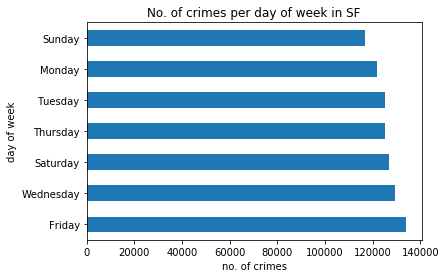

In [23]:
ax = data.DayOfWeek.value_counts().plot('barh')
ax.set(xlabel="no. of crimes", ylabel="day of week", title="No. of crimes per day of week in SF")

#### Comments
In the plot above, we can see that the crimes are more common on Fridays and less common on Sundays. I believe this could also be related to the number of people on streets. As on Sundays there is less people on streets, the amount of crimes is less. After that, I decided to see the relatioship between day of the week and the district? Is the distribution different? According to the plots below, the answer is no.

[Text(0,0.5,'day of week'),
 Text(0.5,0,'no. of crimes'),
 Text(0.5,1,'No. of crimes per day of week and district in SF')]

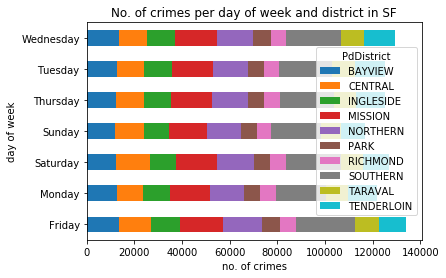

In [25]:
ax = data[['PdDistrict', 'DayOfWeek']].groupby(['PdDistrict', 'DayOfWeek'])['DayOfWeek'].count().unstack('PdDistrict').plot.barh(stacked=True)
ax.set(xlabel="no. of crimes", ylabel="day of week", title="No. of crimes per day of week and district in SF")

[Text(0,0.5,'districts'),
 Text(0.5,0,'no. of crimes'),
 Text(0.5,1,'No. of crimes per day of week and district in SF')]

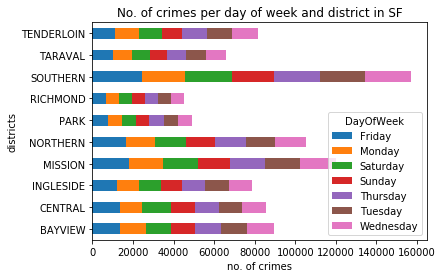

In [26]:
ax = data[['PdDistrict', 'DayOfWeek']].groupby(['PdDistrict', 'DayOfWeek'])['DayOfWeek'].count().unstack('DayOfWeek').plot.barh(stacked=True)
ax.set(xlabel="no. of crimes", ylabel="districts", title="No. of crimes per day of week and district in SF")

### Research Question 2  - How are the crimes distributed per month?

For the following plot, we want to analyze the distribution of crimes per month during the year. Before plotting this, I didn't have any hypothesis in mind, but I thought that maybe in the winter there is less people in the streets, so the number of crimes would be less.

[Text(0,0.5,'No. of crimes'),
 Text(0.5,0,'Month'),
 Text(0.5,1,'No. of crimes per month in SF')]

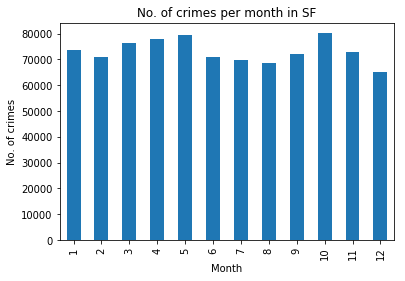

In [27]:
data['month'] = pd.to_datetime(data.Dates, format="%Y-%m-%d")
data['month'] = data['month'].map(lambda x: x.month)
ax = data['month'].value_counts(sort=False).plot('bar') 
ax.set(xlabel="Month", ylabel="No. of crimes", title="No. of crimes per month in SF")

#### Interesting finding
Interestingly, the number of crimes is lower during the winter (December to February) and the summer (June to August), and higher during the spring (March to May) and the fall (September to November). 

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

<b>1.</b> Sunday is the day of week of apparently less crime, whereas Friday seems to be the most "criminal" day. To make sure that this is not due chance, we would have to perform a statistical test. Maybe we would also have to compare the number of crimes with the number of people on streets in each day, but unfortunately we don't have this information, which is a limitation.<br />
<b>2.</b> It seems that the number of crimes per day of the week does not change from district to district. This is also concluded only by visualization, but we would have to apply a statistical test to confirm that the proportions don't change.<br />
<b>3.</b> For some reason, crimes ocurr less during the summer and during the winter. Maybe because of vacations? Unfortunately we can't make these assumptions. Again, here we have the limitation of not having the information about the number of people on streets. In this case (having more information), we would be able to compute other metrics, as: number of crimes per number of people on streets (per day of week/month, per month/season and per district).